### 旧31-6分类器的真实标签溯源——氨基酸打分（24-03-06）
### *5A_all-atom_cutoff & 0.05-ratio*

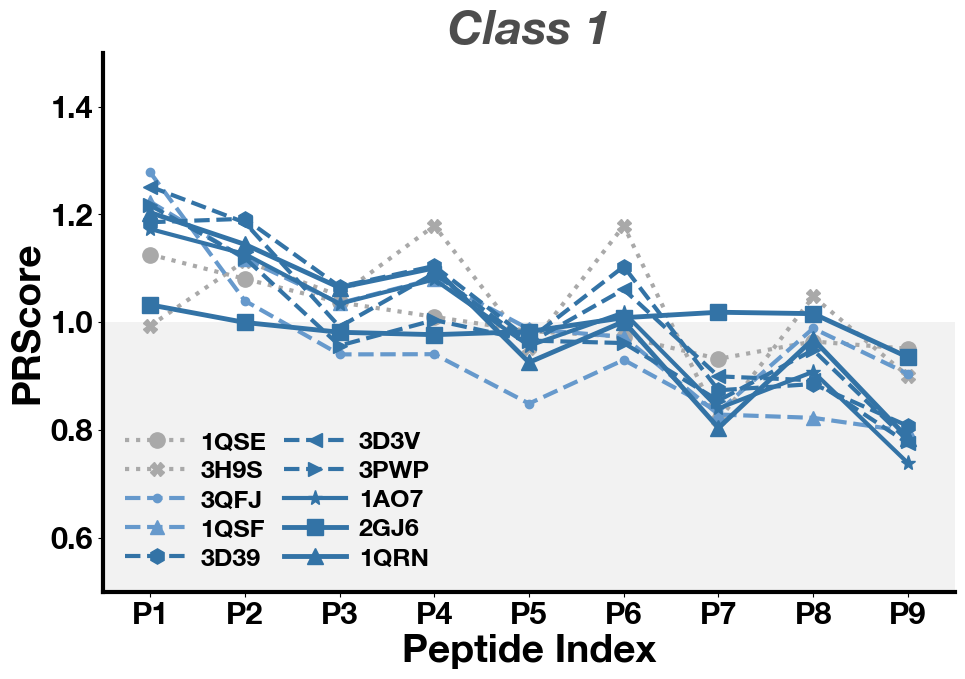

In [95]:
import os
import numpy as np
import sys
from Bio.PDB import * ## 未使用
from biopandas.pdb import PandasPdb
from scipy import spatial
import pandas as pd
import csv

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 逐行读取csv
score_csv = "./0.10/scorepep_sum.csv"
i = 0 ##
## 初始化作图y值：score
for i in range(1, 32):
    # print(i) [1, 20]
    exec('s_y{} = []'.format(i))    
score_ylist = []
with open(score_csv, 'r') as sfile:
    reader = csv.reader(sfile)
    for row in reader:
        i = i + 1 ## 行索引（从1开始）
        score_list_0 = np.array(row[1:])
        score_list = [float(score) for score in score_list_0] ## 转换成数值列表
        score_ylist.append(score_list)
        
        
## 作图： Class 1
#修改字体大小及其格式
from pylab import mpl
plt.rc('font',family='Helvetica Neue',weight='bold',) 
mpl.rcParams['font.size']=15

fig, ax = plt.subplots(figsize=(11, 7))

#设置自变量的范围和个数
x = ["P1", "P2", "P3", "P4" ,"P5", "P6", "P7", "P8", "P9"]

## 画图

#score_ylist[7].append(None)
## 根据画图线时的覆盖顺序，我们希望预测更准确的结构更显眼 24.Dec

ax.plot(x,score_ylist[2], label='1QSE', linestyle='dotted', linewidth = 3,marker='o',  markersize='11', color = 'darkgrey')
ax.plot(x,score_ylist[7], label='3H9S', linestyle='dotted', linewidth = 3,marker='X',  markersize='10',color = 'darkgrey')

ax.plot(x,score_ylist[5], label='3QFJ', linestyle='--', linewidth = 3, marker='.',  markersize='12', color = '#6699CC')
ax.plot(x,score_ylist[3], label='1QSF', linestyle='--', linewidth = 3,marker='^',  markersize='10', color = '#6699CC')

ax.plot(x,score_ylist[8], label='3D39', linestyle='--', linewidth = 3,marker='h',  markersize='11',color = (0.20,0.45,0.65))
ax.plot(x,score_ylist[9], label='3D3V', linestyle='--', linewidth = 3,marker='<',  markersize='10',color = (0.20,0.45,0.65))
ax.plot(x,score_ylist[6], label='3PWP', linestyle='--', linewidth = 3,marker='>',  markersize='10', color = (0.20,0.45,0.65))
ax.plot(x,score_ylist[0], label='1AO7', linestyle='-', linewidth = 3, marker='*',  markersize='11', color = (0.20,0.45,0.65))
ax.plot(x,score_ylist[4], label='2GJ6', linestyle='-', linewidth = 3.5,marker='s',  markersize='11',color = (0.20,0.45,0.65))
ax.plot(x,score_ylist[1], label='1QRN', linestyle='-', linewidth = 3.5,marker='^',  markersize='11', color = (0.20,0.45,0.65))



## 绘制水平“1”基准线
y1 = [1,1,1,1,1,1,1,1,1,]
#ax.plot(x,y1,linestyle='-.',linewidth = 5, color = (0.3,0.3,0.3) )

#设置坐标轴
ax.set_xlim(-0.5, 8.5)
ax.set_ylim(0.5, 1.5)
ax.set_xlabel('Peptide Index', fontsize=28, weight='bold')
ax.set_ylabel('PRScore', fontsize=28, weight='bold',)
#设置刻度
ax.tick_params(axis='both', labelsize=22, )

# 添加标题 
plt.title('Class 1',fontsize=34,weight='bold', style='italic',color=(0.3, 0.3, 0.3)) 

# 填充y<0的区域为浅灰色
plt.axhspan(ymin=0, ymax=1, xmin=0, xmax=8, facecolor=(0.9,0.9,0.9), alpha=0.5)

#添加图例
legend = ax.legend(fontsize=18, labelspacing=0.3,handlelength=2.5,handletextpad=0.5,columnspacing=0.7,fancybox='True',loc='lower left',ncol=2,facecolor=(0.95,0.95,0.95),edgecolor=(0.95,0.95,0.95))

## 边框设置
bwith = 3 #边框宽度设置为2
ax = plt.gca()#获取边框
#设置边框
ax.spines['bottom'].set_linewidth(bwith)#图框下边
ax.spines['left'].set_linewidth(bwith)#图框左边
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



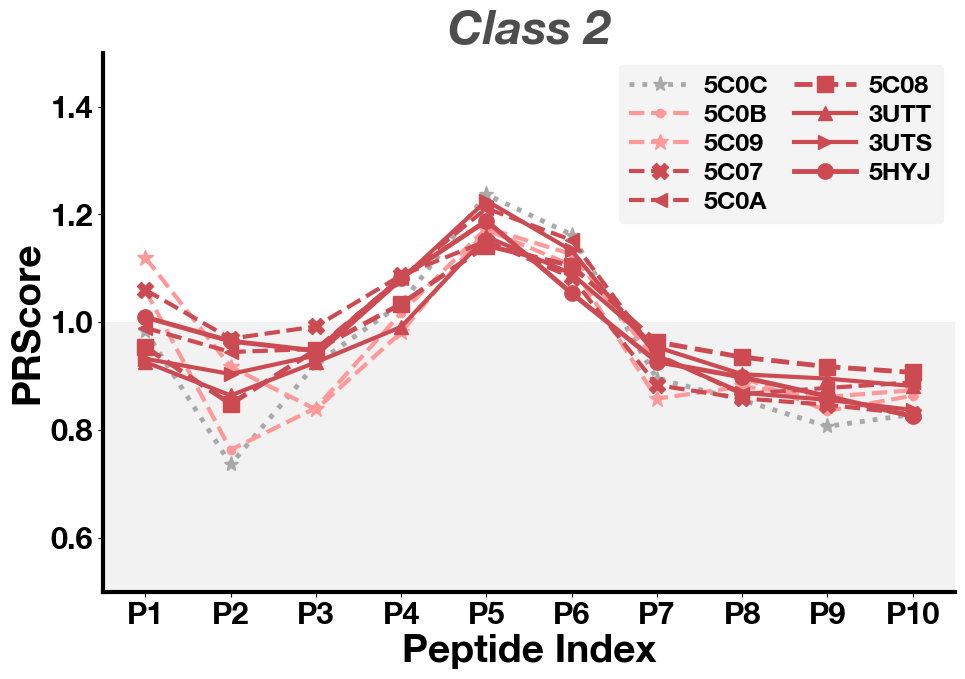

In [96]:
## 作图： Class 2
#修改字体大小及其格式
from pylab import mpl
plt.rc('font',family='Helvetica Neue',weight='bold',) 
mpl.rcParams['font.size']=15

fig, ax = plt.subplots(figsize=(11, 7))

#设置自变量的范围和个数
x = ["P1", "P2", "P3", "P4" ,"P5", "P6", "P7", "P8", "P9","P10"]

## 画图
ax.plot(x,score_ylist[17], label='5C0C', linestyle='dotted', linewidth = 3.5,marker='*',  markersize='11', color = 'darkgrey')

ax.plot(x,score_ylist[16], label='5C0B', linestyle='--', linewidth = 3, marker='.',  markersize='12', color ='#FF9999')
ax.plot(x,score_ylist[12], label='5C09', linestyle='--', linewidth = 3, marker='*',  markersize='12', color = '#FF9999')

ax.plot(x,score_ylist[11], label='5C07', linestyle='--', linewidth = 3,marker='X',  markersize='12',color = (0.80,0.29,0.32))
ax.plot(x,score_ylist[15], label='5C0A', linestyle='--', linewidth = 3,marker='<',  markersize='10', color = (0.80,0.29,0.32))
ax.plot(x,score_ylist[18], label='5C08', linestyle='--', linewidth = 3.5,marker='s',  markersize='11', color = (0.80,0.29,0.32))
ax.plot(x,score_ylist[14], label='3UTT', linestyle='-', linewidth = 3,marker='^',  markersize='10',color = (0.80,0.29,0.32))
ax.plot(x,score_ylist[13], label='3UTS', linestyle='-', linewidth = 3,marker='>',  markersize='10', color = (0.80,0.29,0.32))
ax.plot(x,score_ylist[10], label='5HYJ', linestyle='-', linewidth = 3.5,marker='o',  markersize='11',color = (0.80,0.29,0.32))





## 绘制水平“1”基准线
y1 = [1,1,1,1,1,1,1,1,1,1,]
#ax.plot(x,y1,linestyle='-.',linewidth = 5, color = (0.3,0.3,0.3) )

#设置坐标轴
ax.set_xlim(-0.5, 9.5)
ax.set_ylim(0.5, 1.5)
ax.set_xlabel('Peptide Index', fontsize=28, weight='bold')
ax.set_ylabel('PRScore', fontsize=28, weight='bold',)
#设置刻度
ax.tick_params(axis='both', labelsize=22)

# 添加标题 
plt.title('Class 2',fontsize=34,weight='bold', style='italic',color=(0.3,0.3,0.3) ) 

# 填充y<0的区域为浅灰色
plt.axhspan(ymin=0, ymax=1, xmin=0, xmax=8, facecolor=(0.9,0.9,0.9) , alpha=0.5)

#添加图例
legend = ax.legend(fontsize=18, labelspacing=0.3,handlelength=2.5,handletextpad=0.5,columnspacing=1,fancybox='True',loc='best',ncol=2,facecolor=(0.95,0.95,0.95),edgecolor=(0.95,0.95,0.95))


## 边框设置
bwith = 3 #边框宽度设置为2
ax = plt.gca()#获取边框
#设置边框
ax.spines['bottom'].set_linewidth(bwith)#图框下边
ax.spines['left'].set_linewidth(bwith)#图框左边
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)




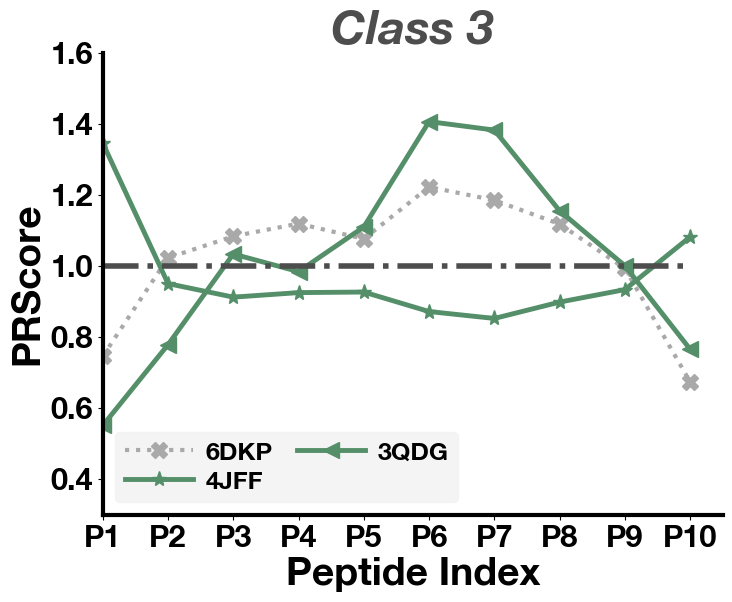

In [106]:
## 作图： Class 3

## 逐行读取csv
i = 0 ##
## 初始化作图y值：score
for i in range(1, 32):
    # print(i) [1, 20]
    exec('s_y{} = []'.format(i))    
score_ylist = []
with open(score_csv, 'r') as sfile:
    reader = csv.reader(sfile)
    for row in reader:
        i = i + 1 ## 行索引（从1开始）
        score_list_0 = np.array(row[1:])
        score_list = [float(score) for score in score_list_0] ## 转换成数值列表
        score_ylist.append(score_list)

#修改字体大小及其格式
from pylab import mpl
plt.rc('font',family='Helvetica Neue',weight='bold',) 
mpl.rcParams['font.size']=15

fig, ax = plt.subplots(figsize=(8, 6))

#设置自变量的范围和个数
x = ["P1", "P2", "P3", "P4" ,"P5", "P6", "P7", "P8", "P9","P10"]

## 画图
score_ylist[19].append(None)
score_ylist[20].append(None)

ax.plot(x,score_ylist[22], label='6DKP', linestyle='dotted', linewidth = 3,marker='X',  markersize='12',color = 'darkgrey')

#ax.plot(x,score_ylist[23], label='6AM5', linestyle='--', linewidth = 3,marker='>',  markersize='10', color = '#99CC99')

#ax.plot(x,score_ylist[19], label='3QDJ', linestyle='-', linewidth = 3.5,marker='o',  markersize='11',color = (0.33,0.56,0.41))
#ax.plot(x,score_ylist[20], label='6D78', linestyle='-', linewidth = 3.5,marker='s',  markersize='11', color = (0.33,0.56,0.41))
ax.plot(x,score_ylist[31], label='4JFF', linestyle='-', linewidth = 3.5,marker='*',  markersize='11', color = (0.33,0.56,0.41))
ax.plot(x,score_ylist[21], label='3QDG', linestyle='-', linewidth = 3.5,marker='<',  markersize='11', color = (0.33,0.56,0.41))


## 绘制水平“1”基准线
y1 = [1,1,1,1,1,1,1,1,1,1,]
ax.plot(x,y1,linestyle='-.',linewidth = 4, color = (0.3,0.3,0.3) )

#设置坐标轴
ax.set_xlim(0, 9.5)
ax.set_ylim(0.3, 1.6)
ax.set_xlabel('Peptide Index', fontsize=28, weight='bold')
ax.set_ylabel('PRScore', fontsize=28, weight='bold',)
#设置刻度
ax.tick_params(axis='both', labelsize=22)
#ax.tick_params(axis="both", which="major", direction="in", width=1, length=5, pad=5)

# 添加标题 
plt.title('Class 3',fontsize=34,weight='bold', style='italic',color=(0.3,0.3,0.3)) 

#添加图例
legend = ax.legend(fontsize=18, labelspacing=0.3,handlelength=2.7,handletextpad=0.5,columnspacing=1,fancybox='True',loc='best',ncol=2,facecolor=(0.95,0.95,0.95),edgecolor=(0.95,0.95,0.95))


## 边框设置
bwith = 3 #边框宽度设置为2
ax = plt.gca()#获取边框
#设置边框
ax.spines['bottom'].set_linewidth(bwith)#图框下边
ax.spines['left'].set_linewidth(bwith)#图框左边
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)





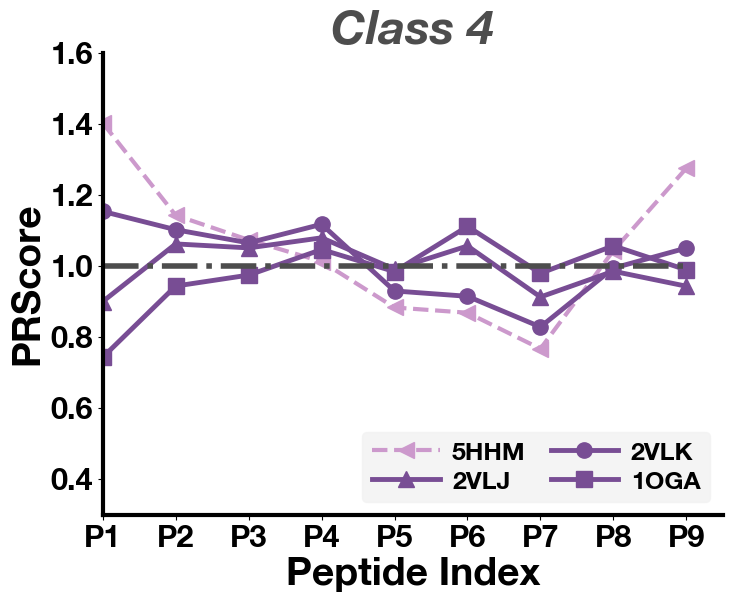

In [19]:
## 作图： Class 4

## 逐行读取csv

i = 0 ##
## 初始化作图y值：score
for i in range(1, 32):
    # print(i) [1, 20]
    exec('s_y{} = []'.format(i))    
score_ylist = []
with open(score_csv, 'r') as sfile:
    reader = csv.reader(sfile)
    for row in reader:
        i = i + 1 ## 行索引（从1开始）
        score_list_0 = np.array(row[1:])
        score_list = [float(score) for score in score_list_0] ## 转换成数值列表
        score_ylist.append(score_list)

#修改字体大小及其格式
from pylab import mpl
plt.rc('font',family='Helvetica Neue',weight='bold',) 
mpl.rcParams['font.size']=15

fig, ax = plt.subplots(figsize=(8, 6))

#设置自变量的范围和个数
x = ["P1", "P2", "P3", "P4" ,"P5", "P6", "P7", "P8", "P9"]

## 画图

ax.plot(x,score_ylist[23], label='5HHM', linestyle='--', linewidth = 3,marker='<',  markersize='12', color = '#CC99CC')

ax.plot(x,score_ylist[24], label='2VLJ', linestyle='-', linewidth = 3.5,marker='^',  markersize='11', color = (0.47,0.30,0.58))
ax.plot(x,score_ylist[25], label='2VLK', linestyle='-', linewidth = 3.5,marker='o',  markersize='11',color = (0.47,0.30,0.58))
ax.plot(x,score_ylist[22], label='1OGA', linestyle='-', linewidth = 3.5,marker='s',  markersize='11', color = (0.47,0.30,0.58))



## 绘制水平“1”基准线
y1 = [1,1,1,1,1,1,1,1,1,]
ax.plot(x,y1,linestyle='-.',linewidth = 4, color = (0.3,0.3,0.3) )

#设置坐标轴
ax.set_xlim(0, 8.5)
ax.set_ylim(0.3, 1.6)
ax.set_xlabel('Peptide Index', fontsize=28, weight='bold')
ax.set_ylabel('PRScore', fontsize=28, weight='bold',)
#设置刻度
ax.tick_params(axis='both', labelsize=22)
#ax.tick_params(axis="both", which="major", direction="in", width=1, length=5, pad=5)

# 添加标题 
plt.title('Class 4',fontsize=34,weight='bold', style='italic',color= (0.3,0.3,0.3)) 

#添加图例
legend = ax.legend(fontsize=18, labelspacing=0.3,handlelength=2.7,handletextpad=0.5,columnspacing=1,fancybox='True',loc='lower right',ncol=2,facecolor=(0.95,0.95,0.95),edgecolor=(0.95,0.95,0.95))


## 边框设置
bwith = 3 #边框宽度设置为2
ax = plt.gca()#获取边框
#设置边框
ax.spines['bottom'].set_linewidth(bwith)#图框下边
ax.spines['left'].set_linewidth(bwith)#图框左边
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)






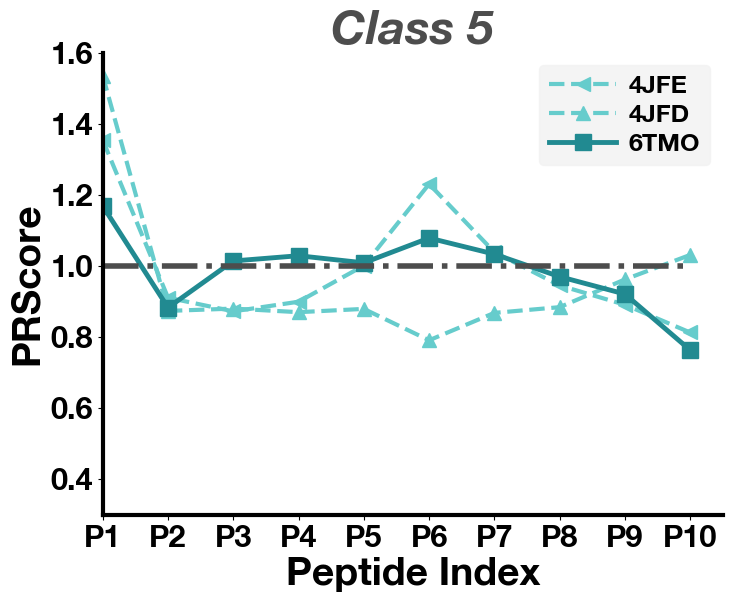

In [22]:
## 作图： Class 5

## 逐行读取csv
i = 0 ##
## 初始化作图y值：score
for i in range(1, 32):
    # print(i) [1, 20]
    exec('s_y{} = []'.format(i))    
score_ylist = []
with open(score_csv, 'r') as sfile:
    reader = csv.reader(sfile)
    for row in reader:
        i = i + 1 ## 行索引（从1开始）
        score_list_0 = np.array(row[1:])
        score_list = [float(score) for score in score_list_0] ## 转换成数值列表
        score_ylist.append(score_list)

#修改字体大小及其格式
from pylab import mpl
plt.rc('font',family='Helvetica Neue',weight='bold',) 
mpl.rcParams['font.size']=15

fig, ax = plt.subplots(figsize=(8, 6))

#设置自变量的范围和个数
x = ["P1", "P2", "P3", "P4" ,"P5", "P6", "P7", "P8", "P9","P10"]

## 画图

ax.plot(x,score_ylist[27], label='4JFE', linestyle='--', linewidth = 3,marker='<',  markersize='10', color = '#66CCCC')
ax.plot(x,score_ylist[26], label='4JFD', linestyle='--', linewidth = 3,marker='^',  markersize='10', color = '#66CCCC')


ax.plot(x,score_ylist[28], label='6TMO', linestyle='-', linewidth = 3.5,marker='s',  markersize='11', color = (0.13,0.54,0.57))



## 绘制水平“1”基准线
y1 = [1,1,1,1,1,1,1,1,1,1,]
ax.plot(x,y1,linestyle='-.',linewidth = 4, color = (0.3,0.3,0.3) )

#设置坐标轴
ax.set_xlim(0, 9.5)
ax.set_ylim(0.3, 1.6)
ax.set_xlabel('Peptide Index', fontsize=28, weight='bold')
ax.set_ylabel('PRScore', fontsize=28, weight='bold',)
#设置刻度
ax.tick_params(axis='both', labelsize=22)
#ax.tick_params(axis="both", which="major", direction="in", width=1, length=5, pad=5)

# 添加标题 
plt.title('Class 5',fontsize=34,weight='bold', style='italic',color=(0.3,0.3,0.3)) 

#添加图例
legend = ax.legend(fontsize=18, labelspacing=0.3,handlelength=2.7,handletextpad=0.5,columnspacing=1,fancybox='True',loc='best',ncol=1,facecolor=(0.95,0.95,0.95),edgecolor=(0.95,0.95,0.95))


## 边框设置
bwith = 3 #边框宽度设置为2
ax = plt.gca()#获取边框
#设置边框
ax.spines['bottom'].set_linewidth(bwith)#图框下边
ax.spines['left'].set_linewidth(bwith)#图框左边
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)






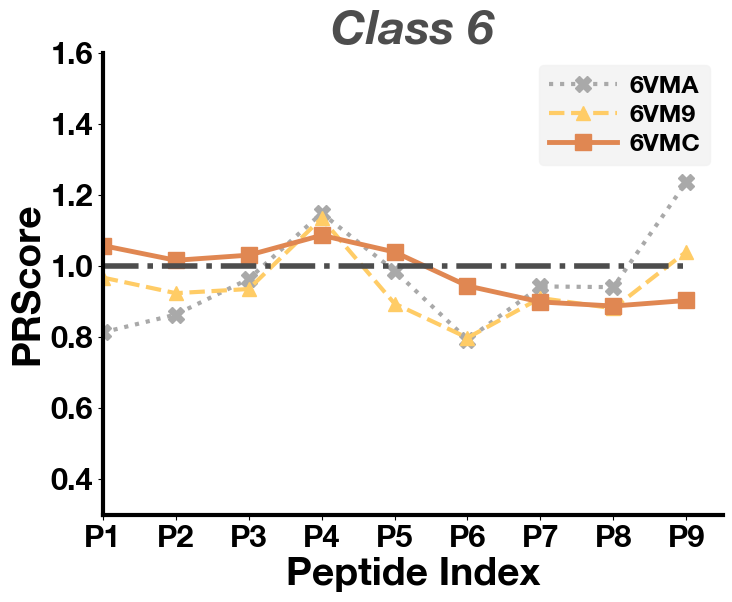

In [24]:
## 作图： Class 6

## 逐行读取csv
i = 0 ##
## 初始化作图y值：score
for i in range(1, 32):
    # print(i) [1, 20]
    exec('s_y{} = []'.format(i))    
score_ylist = []
with open(score_csv, 'r') as sfile:
    reader = csv.reader(sfile)
    for row in reader:
        i = i + 1 ## 行索引（从1开始）
        score_list_0 = np.array(row[1:])
        score_list = [float(score) for score in score_list_0] ## 转换成数值列表
        score_ylist.append(score_list)

#修改字体大小及其格式
from pylab import mpl
plt.rc('font',family='Helvetica Neue',weight='bold',) 
mpl.rcParams['font.size']=15

fig, ax = plt.subplots(figsize=(8, 6))

#设置自变量的范围和个数
x = ["P1", "P2", "P3", "P4" ,"P5", "P6", "P7", "P8", "P9"]

## 画图

ax.plot(x,score_ylist[31], label='6VMA', linestyle='dotted', linewidth = 3,marker='X',  markersize='12',color = 'darkgrey')

ax.plot(x,score_ylist[30], label='6VM9', linestyle='--', linewidth = 3,marker='^',  markersize='10', color = '#FFCC66')

ax.plot(x,score_ylist[29], label='6VMC', linestyle='-', linewidth = 3.5,marker='s',  markersize='11', color = (0.88,0.53,0.32))



## 绘制水平“1”基准线
y1 = [1,1,1,1,1,1,1,1,1,]
ax.plot(x,y1,linestyle='-.',linewidth = 4, color = (0.3,0.3,0.3) )

#设置坐标轴
ax.set_xlim(0, 8.5)
ax.set_ylim(0.3, 1.6)
ax.set_xlabel('Peptide Index', fontsize=28, weight='bold')
ax.set_ylabel('PRScore', fontsize=28, weight='bold',)
#设置刻度
ax.tick_params(axis='both', labelsize=22)
#ax.tick_params(axis="both", which="major", direction="in", width=1, length=5, pad=5)

# 添加标题 
plt.title('Class 6',fontsize=34,weight='bold', style='italic',color=(0.3,0.3,0.3)) 

#添加图例
legend = ax.legend(fontsize=18, labelspacing=0.3,handlelength=2.7,handletextpad=0.5,columnspacing=1,fancybox='True',loc='best',ncol=1,facecolor=(0.95,0.95,0.95),edgecolor=(0.95,0.95,0.95))


## 边框设置
bwith = 3 #边框宽度设置为2
ax = plt.gca()#获取边框
#设置边框
ax.spines['bottom'].set_linewidth(bwith)#图框下边
ax.spines['left'].set_linewidth(bwith)#图框左边
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)





